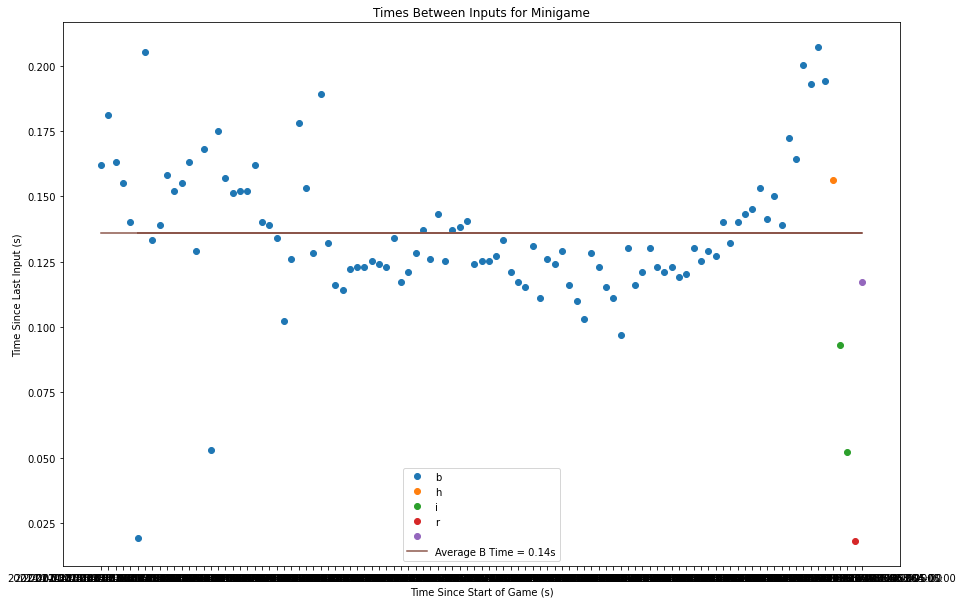

In [15]:
import json
import matplotlib.pyplot as plt
import datetime
import dateutil.parser

# Load data
with open('./digger_data.json') as f:
    data = json.load(f)
input_data = data.get('metrics')


# Process data
def delta_times_fn(times):
    result = []
    for i in range(len(times) - 1):
        d_time = (dateutil.parser.parse(times[i + 1]) - dateutil.parser.parse(times[i])).total_seconds()
        result.append(d_time)
    return result

timeList = []
buttonPressing = input_data[0].get('buttonPressing')
for i in buttonPressing:
    if i.get('keyDown'):
        key = chr(i.get('keyCode'))
        time = i.get('eventTime')
        timeList.append((key, time))

delta_times = delta_times_fn([j for (i, j) in timeList])
times = [(timeList[i + 1][0], timeList[i + 1][1], delta_times[i]) for i in range(len(delta_times))
]

down_times_dict = {}
for (key, time, d_time) in times:
    if key not in down_times_dict:
        down_times_dict[key] = [(time, d_time)]
    else:
        down_times_dict[key].append((time, d_time))
        
# Create figure
_, fig = plt.subplots(figsize=(15, 10))

# Plot data
for key in down_times_dict.keys():
    ts = [t for (t, dt) in down_times_dict[key]]
    dts = [dt for (t, dt) in down_times_dict[key]]
    fig.plot(ts, dts, 'o', label=key)

# Average time
avg = 0
for i in down_times_dict['b']:
   avg += i[1]
avg /= len(down_times_dict['b'])

xs = [j for (i, j, k) in times]
ys = [avg for (i, j, k) in times]
fig.plot(xs, ys, '-', label='Average B Time = %.2fs' % avg)

# Misc. Figure Setup
fig.set_title('Times Between Inputs for Minigame')
fig.set_xlabel('Time Since Start of Game (s)')
fig.set_ylabel('Time Since Last Input (s)')
fig.legend()
